# Challenge

In [1]:
# !pip install plotly
# !pip install "notebook>=5.3" "ipywidgets>=7.5"

In [2]:
# !conda install -c plotly plotly

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px

In [4]:
# load the data in the file data/gapminder_lifeexpectancy.xlsx
life = pd.read_excel('./data/gapminder_lifeexpectancy.xlsx', index_col=0, nrows=260)

In [5]:
life.index.name = "country"
life.reset_index(inplace=True)

In [6]:
life = life.melt(id_vars='country', var_name='year', value_name='life_expectency')
life

,country,year,life_expectency
0,Abkhazia,1800.0,NaN
1,Afghanistan,1800.0,28.21
2,Akrotiri and Dhekelia,1800.0,NaN
3,Albania,1800.0,35.40
4,Algeria,1800.0,28.82
...,...,...,...
56415,Yugoslavia,2016.0,NaN
56416,Zambia,2016.0,57.10
56417,Zimbabwe,2016.0,61.69
56418,Åland,2016.0,NaN


In [7]:
# load the data in the file data/continents.csv
cont = pd.read_csv("./data/continents.csv", sep=";")
cont

,continent,country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina
...,...,...
189,South America,Paraguay
190,South America,Peru
191,South America,Suriname
192,South America,Uruguay


In [8]:
# merge both DataFrames
merged_df = pd.merge(left=cont, right=life, on="country", how="left")
merged_df

,continent,country,year,life_expectency
0,Africa,Algeria,1800.0,28.82
1,Africa,Algeria,1801.0,28.82
2,Africa,Algeria,1802.0,28.82
3,Africa,Algeria,1803.0,28.82
4,Africa,Algeria,1804.0,28.82
...,...,...,...,...
38205,South America,Venezuela,2012.0,74.60
38206,South America,Venezuela,2013.0,74.70
38207,South America,Venezuela,2014.0,74.80
38208,South America,Venezuela,2015.0,74.80


In [9]:
# remove all rows with empty values
merged_df.dropna(inplace=True)

In [10]:
merged_df = merged_df[merged_df["year"] > 1960]

In [11]:
# print the highest and lowest life expectancy for each continent
merged_df.groupby("continent")["life_expectency"].agg(['min', 'max'])

,min,max
continent,,
Africa,13.20,77.6
Asia,18.10,83.3
Australia and Oceania,39.20,82.4
Europe,61.76,84.8
North America,32.20,81.7
South America,44.14,79.7


<AxesSubplot:xlabel='life_expectency', ylabel='continent'>

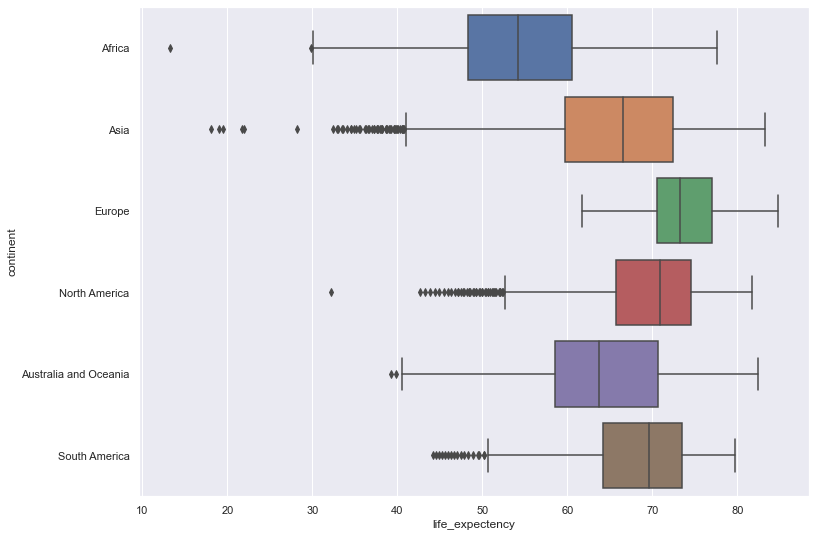

In [43]:
sns.set(rc={'figure.figsize':(12,9)})
sns.boxplot(data=merged_df, y = "continent", x = "life_expectency")

In [13]:
merged_df

,continent,country,year,life_expectency
161,Africa,Algeria,1961.0,48.02
162,Africa,Algeria,1962.0,48.55
163,Africa,Algeria,1963.0,49.07
164,Africa,Algeria,1964.0,49.58
165,Africa,Algeria,1965.0,50.09
...,...,...,...,...
38205,South America,Venezuela,2012.0,74.60
38206,South America,Venezuela,2013.0,74.70
38207,South America,Venezuela,2014.0,74.80
38208,South America,Venezuela,2015.0,74.80


<AxesSubplot:xlabel='year', ylabel='life_expectency'>

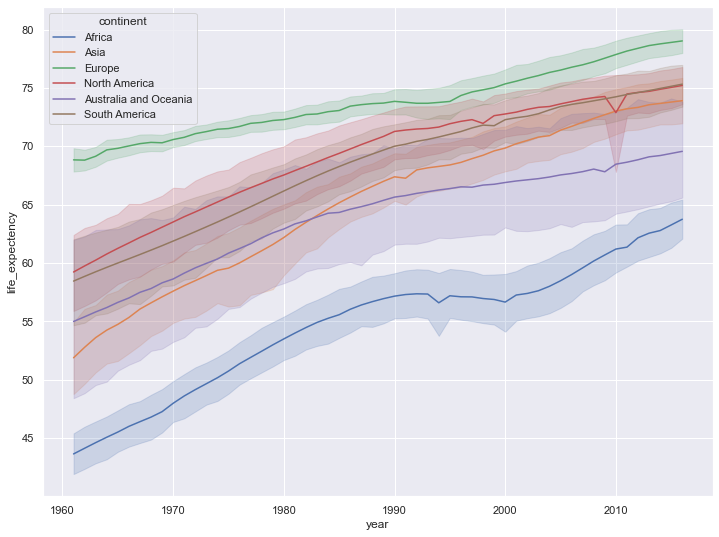

In [42]:
sns.set(rc={'figure.figsize':(12,9)})
sns.lineplot(x = "year", y = "life_expectency", data = merged_df, hue = "continent")

In [26]:
df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
60,Australia,Oceania,1952,69.120,8691212,10039.59564,AUS,36
61,Australia,Oceania,1957,70.330,9712569,10949.64959,AUS,36
62,Australia,Oceania,1962,70.930,10794968,12217.22686,AUS,36
63,Australia,Oceania,1967,71.100,11872264,14526.12465,AUS,36
64,Australia,Oceania,1972,71.930,13177000,16788.62948,AUS,36
65,Australia,Oceania,1977,73.490,14074100,18334.19751,AUS,36
66,Australia,Oceania,1982,74.740,15184200,19477.00928,AUS,36
67,Australia,Oceania,1987,76.320,16257249,21888.88903,AUS,36
68,Australia,Oceania,1992,77.560,17481977,23424.76683,AUS,36
69,Australia,Oceania,1997,78.830,18565243,26997.93657,AUS,36


In [36]:
merged_df.groupby(["continent", "year"]).mean().reset_index()

,continent,year,life_expectency
0,Africa,1961.0,43.649400
1,Africa,1962.0,44.136200
2,Africa,1963.0,44.617200
3,Africa,1964.0,45.079800
4,Africa,1965.0,45.523200
...,...,...,...
331,South America,2012.0,74.608333
332,South America,2013.0,74.775000
333,South America,2014.0,74.958333
334,South America,2015.0,75.141667


In [41]:
pd.options.plotting.backend = "plotly"

fig = px.line(
      merged_df.groupby(["continent", "year"]).mean().reset_index()
    , x = "year"
    , y = "life_expectency"
    , color = "continent"
)
fig.show()

fig.write_html("./output/life-expectency.html")

In [15]:
merged_df

,continent,country,year,life_expectency
161,Africa,Algeria,1961.0,48.02
162,Africa,Algeria,1962.0,48.55
163,Africa,Algeria,1963.0,49.07
164,Africa,Algeria,1964.0,49.58
165,Africa,Algeria,1965.0,50.09
...,...,...,...,...
38205,South America,Venezuela,2012.0,74.60
38206,South America,Venezuela,2013.0,74.70
38207,South America,Venezuela,2014.0,74.80
38208,South America,Venezuela,2015.0,74.80


## Recap

In [2]:
# 1. Read a data file
df = pd.read_csv('./data/gapminder_total_fertility.csv', index_col=0)

In [3]:
# 2. Inspect the size of a DataFrame
df.shape

(260, 216)

In [4]:
df.columns

Index(['1800', '1801', '1802', '1803', '1804', '1805', '1806', '1807', '1808',
       '1809',
       ...
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015'],
      dtype='object', length=216)

In [5]:
# 3. Convert column labels to integers
# df.columns = df.columns.astype(int)
# df.set_axis(df.columns.astype(int), axis=0, inplace=True)
df.set_axis(df.columns.astype(int), axis=1, inplace=True)
df.columns

Int64Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
            ...
            2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
           dtype='int64', length=216)

In [6]:
# 4. Remove rows with missing values
df.dropna(inplace=True)

In [7]:
df

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Total fertility rate,,,,,,,,,,,,,,,,,,,,,
Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,6.70,6.46,6.20,5.93,5.66,5.40,5.14,4.90,4.68,4.47
Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.85,1.80,1.76,1.74,1.74,1.75,1.76,1.77,1.78,1.78
Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,2.58,2.66,2.73,2.78,2.82,2.83,2.82,2.80,2.76,2.71
Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,6.94,...,6.60,6.52,6.43,6.33,6.22,6.10,5.98,5.86,5.75,5.65
Antigua and Barbuda,5.00,5.00,4.99,4.99,4.99,4.98,4.98,4.97,4.97,4.97,...,2.20,2.18,2.16,2.15,2.13,2.12,2.10,2.09,2.08,2.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,4.70,4.70,4.70,4.70,4.70,4.70,4.70,4.70,4.70,4.70,...,1.89,1.88,1.86,1.84,1.82,1.79,1.77,1.74,1.72,1.70
Virgin Islands (U.S.),5.55,5.55,5.55,5.55,5.55,5.55,5.55,5.55,5.55,5.55,...,2.34,2.39,2.44,2.47,2.49,2.50,2.50,2.49,2.47,2.45
Yemen,6.88,6.88,6.88,6.88,6.88,6.88,6.88,6.88,6.88,6.88,...,5.20,5.01,4.83,4.66,4.50,4.35,4.21,4.08,3.95,3.83


In [8]:
# 5. Inspect a single value
df.loc['Germany', 2000]

1.35

In [9]:
# 6. Calculate the mean of a column
df[2000].mean()

3.249949748743718

In [10]:
# 7. Filter rows with values in given range
df[df[2000].between(6.0, 6.5)][2000]

Total fertility rate
Malawi     6.25
Nigeria    6.10
Yemen      6.36
Zambia     6.07
Name: 2000, dtype: float64

In [11]:
df

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Total fertility rate,,,,,,,,,,,,,,,,,,,,,
Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,6.70,6.46,6.20,5.93,5.66,5.40,5.14,4.90,4.68,4.47
Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.85,1.80,1.76,1.74,1.74,1.75,1.76,1.77,1.78,1.78
Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,2.58,2.66,2.73,2.78,2.82,2.83,2.82,2.80,2.76,2.71
Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,6.94,...,6.60,6.52,6.43,6.33,6.22,6.10,5.98,5.86,5.75,5.65
Antigua and Barbuda,5.00,5.00,4.99,4.99,4.99,4.98,4.98,4.97,4.97,4.97,...,2.20,2.18,2.16,2.15,2.13,2.12,2.10,2.09,2.08,2.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,4.70,4.70,4.70,4.70,4.70,4.70,4.70,4.70,4.70,4.70,...,1.89,1.88,1.86,1.84,1.82,1.79,1.77,1.74,1.72,1.70
Virgin Islands (U.S.),5.55,5.55,5.55,5.55,5.55,5.55,5.55,5.55,5.55,5.55,...,2.34,2.39,2.44,2.47,2.49,2.50,2.50,2.49,2.47,2.45
Yemen,6.88,6.88,6.88,6.88,6.88,6.88,6.88,6.88,6.88,6.88,...,5.20,5.01,4.83,4.66,4.50,4.35,4.21,4.08,3.95,3.83


<AxesSubplot:>

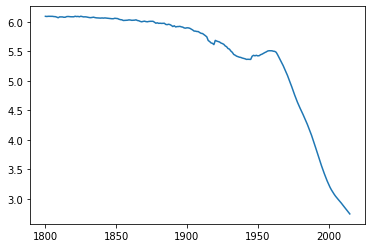

In [13]:
# 8. Mean fertility over time
# melted = df.melt(var_name="year", value_name="fertility")
# d = melted.groupby("year").mean().reset_index()
# d
# sns.lineplot(data=d, x="year", y="fertility")

df.mean().plot()

In [16]:
df.loc[['Germany', 'Sweden', 'Kenya']].transpose()

Total fertility rate,Germany,Sweden,Kenya
1800,5.40,4.07,6.91
1801,5.40,4.26,6.91
1802,5.39,4.50,6.91
1803,5.39,4.45,6.91
1804,5.38,4.52,6.91
...,...,...,...
2011,1.40,1.90,4.54
2012,1.41,1.91,4.46
2013,1.42,1.93,4.38
2014,1.43,1.93,4.31


<AxesSubplot:>

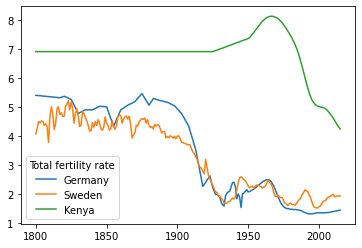

In [18]:
# 9. Three countries over time
df.loc[['Germany', 'Sweden', 'Kenya']].transpose().plot()

<AxesSubplot:>

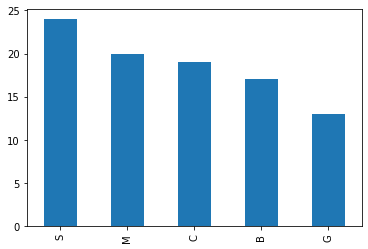

In [29]:
# 10. Countries with most frequent initials
df.reset_index()['Total fertility rate'].str[0].value_counts().head().plot.bar()
# df.reset_index()['Total fertility rate'].str[0].value_counts().head(5).plot.bar()
# df.reset_index()['Total fertility rate'].str[0].value_counts.head.plot.bar